In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [6]:
df = pd.read_csv('ts_data.txt')
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [7]:
df.shape

(204, 2)

In [8]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [9]:
df['date'][-20:]

184    2006-11-01
185    2006-12-01
186    2007-01-01
187    2007-02-01
188    2007-03-01
189    2007-04-01
190    2007-05-01
191    2007-06-01
192    2007-07-01
193    2007-08-01
194    2007-09-01
195    2007-10-01
196    2007-11-01
197    2007-12-01
198    2008-01-01
199    2008-02-01
200    2008-03-01
201    2008-04-01
202    2008-05-01
203    2008-06-01
Name: date, dtype: object

#### Inference
Data is sequentially Indexed with Time

In [10]:
df1 = df.copy()
df2 = df.copy()
df1.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [11]:
df1['Lag1'] = df1['value'].shift(1)
df1['Lag2'] = df1['value'].shift(2)
df1.head()

,date,value,Lag1,Lag2
0,1991-07-01,3.526591,NaN,NaN
1,1991-08-01,3.180891,3.526591,NaN
2,1991-09-01,3.252221,3.180891,3.526591
3,1991-10-01,3.611003,3.252221,3.180891
4,1991-11-01,3.565869,3.611003,3.252221


In [12]:
df1.tail()

,date,value,Lag1,Lag2
199,2008-02-01,21.654285,29.665356,25.806090
200,2008-03-01,18.264945,21.654285,29.665356
201,2008-04-01,23.107677,18.264945,21.654285
202,2008-05-01,22.912510,23.107677,18.264945
203,2008-06-01,19.431740,22.912510,23.107677


In [13]:
df1['Diff1'] = df1['value'] - df1['Lag1']
df1['Diff2'] = df1['value'] - df1['Lag2']
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2
0,1991-07-01,3.526591,NaN,NaN,NaN,NaN
1,1991-08-01,3.180891,3.526591,NaN,-0.345700,NaN
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648


In [14]:
df1['Diff1_M2'] = df1['value'].diff(1)
df1['Diff2_M2'] = df1['value'].diff(2)
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2
0,1991-07-01,3.526591,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-08-01,3.180891,3.526591,NaN,-0.345700,NaN,-0.345700,NaN
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648


In [15]:
df1.dropna(inplace=True)
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466


In [16]:
df1.isnull().sum()

date        0
value       0
Lag1        0
Lag2        0
Diff1       0
Diff2       0
Diff1_M2    0
Diff2_M2    0
dtype: int64

In [17]:
df1['Log'] = np.log(df1['value'])
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370,1.179338
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951


In [18]:
df1['Log_Diff'] = df1['value'] - df1['Log']
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log,Log_Diff
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370,1.179338,2.072883
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986,2.327017
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408,2.294461
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096,2.846275
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951,3.461384


### Plot Value

In [19]:
df2.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [20]:
df2.set_index('date',inplace=True)
df2.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


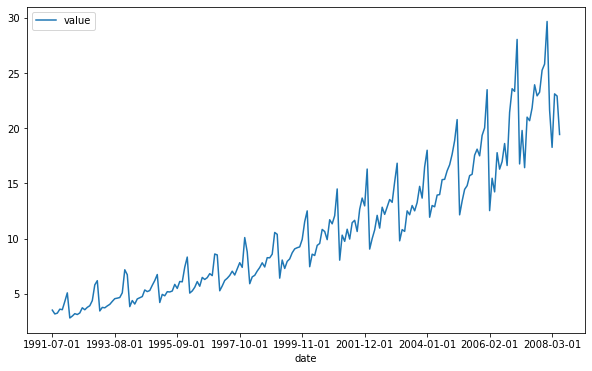

In [21]:
df2.plot(figsize=(10,6))
plt.show()

### Decomposing Time Series Data

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
# decom = seasonal_decompose(df2,model='multiplicative')
# decom.

In [24]:
type(df2)

pandas.core.frame.DataFrame

In [25]:
df3 = pd.read_csv('ts_data.txt',index_col=[0],parse_dates=True)
df3.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [26]:
type(df2.index)

pandas.core.indexes.base.Index

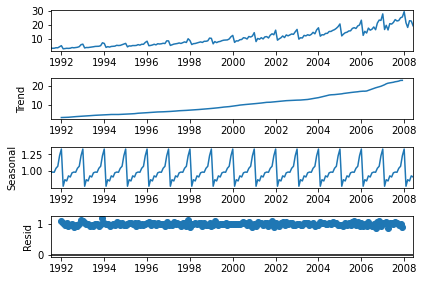

In [27]:
decom = seasonal_decompose(df3, model='multiplicative')
decom.plot()
plt.show()

# original = decom.observed
# trend = decom.trend
# seasonality = decom.seasonal
# residual = decom.resid

# plt.plot(original,label='Original',color='lightblue')
# plt.plot(trend,label='trend',color='orange')
# plt.legend()
# plt.show()

### Checking Stationarity

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
def adf_test(data):
    res = adfuller(data)
    print('ADF-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]> 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [30]:
adf_test(df1['value'])

ADF-Test_Stat 3.2291419431171047
p-val 1.0
Ho accepted - Data is non-stationary


### Transformations to make Data Stationary

In [31]:
adf_test(np.log(df2))

ADF-Test_Stat -0.988733488947917
p-val 0.7573512901699138
Ho accepted - Data is non-stationary


In [32]:
adf_test(df1['Diff1'])

ADF-Test_Stat -2.425802098761484
p-val 0.13458598042526954
Ho accepted - Data is non-stationary


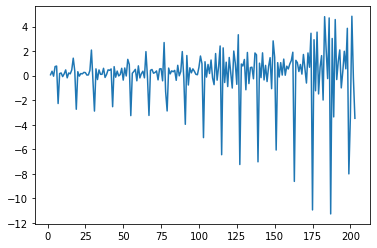

In [33]:
df1['Diff1'].plot()
plt.show()
# Trend has been reduced

In [34]:
adf_test(df1['Diff2'])

ADF-Test_Stat -2.4954628352950308
p-val 0.11658217250240965
Ho accepted - Data is non-stationary


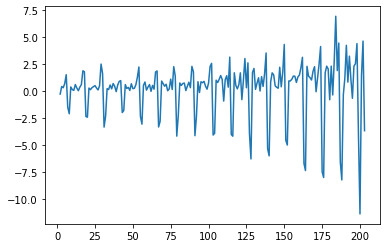

In [35]:
df1['Diff2'].plot()
plt.show()
# Trend has been reduced

In [36]:
adf_test(df1['Log_Diff'])
# time - data
# time = sales
# predictions = final prediction

# time = Sales - log(Sales)

ADF-Test_Stat 3.3778009018790804
p-val 1.0
Ho accepted - Data is non-stationary


In [37]:
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log,Log_Diff
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370,1.179338,2.072883
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986,2.327017
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408,2.294461
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096,2.846275
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951,3.461384


In [38]:
df1['Roll_mean2'] = df1['value'].rolling(window=2).mean()
df1['Roll_std2'] = df1['value'].rolling(window=2).std()
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log,Log_Diff,Roll_mean2,Roll_std2
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370,1.179338,2.072883,NaN,NaN
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986,2.327017,3.431612,0.253697
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408,2.294461,3.588436,0.031915
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096,2.846275,3.936120,0.523614
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951,3.461384,4.697353,0.552932


In [39]:
# (3.252221 + 3.611003)/2
# 3.4316120000000003

In [40]:
df1.dropna(inplace=True)
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log,Log_Diff,Roll_mean2,Roll_std2
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986,2.327017,3.431612,0.253697
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408,2.294461,3.588436,0.031915
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096,2.846275,3.936120,0.523614
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951,3.461384,4.697353,0.552932
7,1992-02-01,2.814520,5.088335,4.306371,-2.273815,-1.491851,-2.273815,-1.491851,1.034792,1.779728,3.951427,1.607830


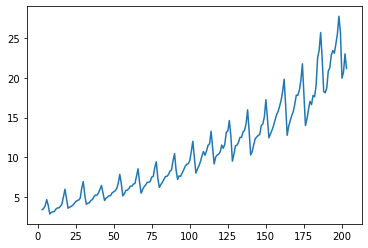

In [41]:
df1['Roll_mean2'].plot()
plt.show()

In [42]:
adf_test(df1['Roll_mean2'])

ADF-Test_Stat 2.536182560871947
p-val 0.9990605968859623
Ho accepted - Data is non-stationary


In [43]:
df1['Roll_mean12'] = df1['value'].rolling(window=12).mean()
df1['Roll_std12'] = df1['value'].rolling(window=12).std()
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log,Log_Diff,Roll_mean2,Roll_std2,Roll_mean12,Roll_std12
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986,2.327017,3.431612,0.253697,NaN,NaN
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408,2.294461,3.588436,0.031915,NaN,NaN
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096,2.846275,3.936120,0.523614,NaN,NaN
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951,3.461384,4.697353,0.552932,NaN,NaN
7,1992-02-01,2.814520,5.088335,4.306371,-2.273815,-1.491851,-2.273815,-1.491851,1.034792,1.779728,3.951427,1.607830,NaN,NaN


In [44]:
df11 = df1.copy()
df11.dropna(inplace=True)
df11.isnull().sum()

date           0
value          0
Lag1           0
Lag2           0
Diff1          0
Diff2          0
Diff1_M2       0
Diff2_M2       0
Log            0
Log_Diff       0
Roll_mean2     0
Roll_std2      0
Roll_mean12    0
Roll_std12     0
dtype: int64

In [45]:
adf_test(df11['Roll_mean12'])

ADF-Test_Stat 3.2249821720019614
p-val 1.0
Ho accepted - Data is non-stationary


In [46]:
# ypred = mx + c
# target variable => log(y)
# y = np.exp(model.predict(x))

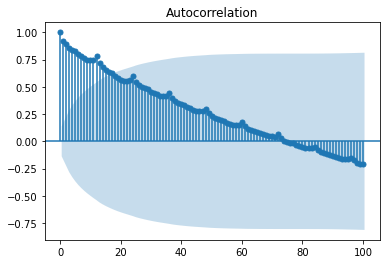

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df3,lags=100)
plt.show()

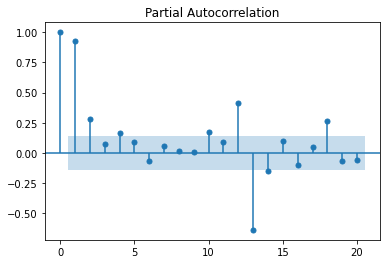

In [48]:
plot_pacf(df3,lags=20)
plt.show()

### ARIMA

In [49]:
from statsmodels.tsa.arima.model import ARIMA

In [55]:
from warnings import filterwarnings
warnings.filterwarnings(action='ignore')

In [56]:
# order = (p,d,q)
m1 = ARIMA(df3,order=(2,1,2)) # p=2,d=1,q=2
ar_m1 = m1.fit()
ar_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -419.002
Date:                Mon, 01 Aug 2022   AIC                            848.004
Time:                        21:47:11   BIC                            864.570
Sample:                    07-01-1991   HQIC                           854.706
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6327      0.102     -6.198      0.000      -0.833      -0.433
ar.L2          0.3640      0.088      4.129      0.000       0.191       0.537
ma.L1          0.1391      0.087      1.596      0.110      -0.032       0.310
ma.L2         -0.8209      0.068    -12.105      0.000      -0.954      -0.688
sigma2         3.6039      0.309     11.659      0.000       2.998       4.210
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               118.86
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               9.47   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

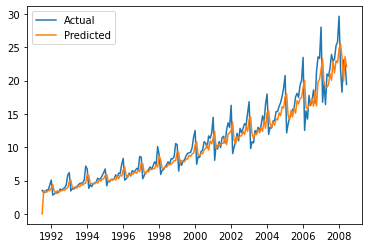

In [57]:
plt.plot(df3,label='Actual')
plt.plot(ar_m1.fittedvalues,label='Predicted')
plt.legend()
plt.show()

In [58]:
df3.tail()

,value
date,
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677
2008-05-01,22.912510
2008-06-01,19.431740


In [59]:
fcast_m1 = ar_m1.forecast(steps=10)
fcast_m1

2008-07-01    21.744592
2008-08-01    21.221261
2008-09-01    22.394165
2008-10-01    21.461561
2008-11-01    22.478536
2008-12-01    21.495636
2009-01-01    22.487682
2009-02-01    21.502251
2009-03-01    22.486826
2009-04-01    21.505200
Freq: MS, Name: predicted_mean, dtype: float64

In [60]:
print('AIC',ar_m1.aic)

AIC 848.0040036259235


#### Model - 2

In [61]:
m2 = ARIMA(df2,order=(6,2,5)) # p=6,d=2,q=5
ar_m2 = m2.fit()
print('AIC',ar_m2.aic)

AIC 829.855458719407


### Data Split

In [62]:
df3.shape

(204, 1)

In [63]:
train = df3[:140]
test = df3[140:]
print(train.shape)
print(test.shape)

(140, 1)
(64, 1)


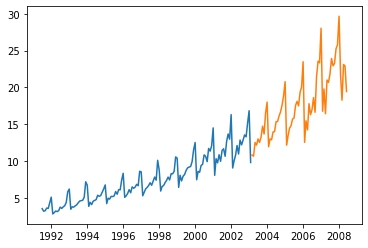

In [64]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.show()

In [65]:
m3 = ARIMA(train,order=(3,2,1))
m3_ar = m3.fit()
print('AIC',m3_ar.aic)

AIC 504.8215994417292


In [66]:
test.head()

,value
date,
2003-03-01,10.816994
2003-04-01,10.654223
2003-05-01,12.512323
2003-06-01,12.161210
2003-07-01,12.998046


In [67]:
fcast_m3 = m3_ar.forecast(steps=64)
fcast_m3

2003-03-01    12.535224
2003-04-01    13.333022
2003-05-01    13.264943
2003-06-01    12.759811
2003-07-01    13.039429
                ...    
2008-02-01    16.803074
2008-03-01    16.870690
2008-04-01    16.938307
2008-05-01    17.005923
2008-06-01    17.073539
Freq: MS, Name: predicted_mean, Length: 64, dtype: float64

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
def test_metrics(ytest,ypred):
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    print('MSE',mse)
    print('RMSE',rmse)


In [70]:
test_metrics(test,fcast_m3)

MSE 19.832750824096344
RMSE 4.453397671901348


In [71]:
#### AIC
# AIC = -2(log-likelihood) + 2K
# k = number of estimated parameters in the model
# {L} = maximum value of the likelihood function for the model

#### AutoARIMA forecasting

In [72]:
# pip install pmdarima

In [73]:
# SARIMA (p,d,q)(P,D,Q,period)

In [74]:
import pmdarima as pm

In [75]:
model_autoar = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoar.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=498.149, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=985.425, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=529.939, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=839.890, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=494.550, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=496.501, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=499.153, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=494.693, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=511.008, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=494.910, Time=0.18 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.356 seconds
                               SARIMAX Results                                
Dep. Variable:               

In [76]:
print(test.shape)
test.head()

(64, 1)


,value
date,
2003-03-01,10.816994
2003-04-01,10.654223
2003-05-01,12.512323
2003-06-01,12.161210
2003-07-01,12.998046


In [77]:
prediction = pd.DataFrame(model_autoar.predict(n_periods = 64),index=test.index)
prediction.columns = ['Pred_Sales']
prediction

,Pred_Sales
date,
2003-03-01,11.953890
2003-04-01,12.480310
2003-05-01,12.605164
2003-06-01,12.630925
2003-07-01,12.632233
...,...
2008-02-01,12.271598
2008-03-01,12.265091
2008-04-01,12.258588


#### Custom ARIMA Function

In [78]:
p = list(range(0,5)) # p=0,1,2,3,4
d = list(range(0,4)) # d = 0,1,2,3
q = list(range(0,5)) # q = 0,1,2,3,4
mse_arima = []
rmse_arima = []
aic_arima = []
pdq = []
def custom_arima():
    for i in p:
        for j in d:
            for k in q:
                param = (i,j,k)
                model = ARIMA(train,order=param)
                model_fit = model.fit()
                ypred = model_fit.forecast(steps=64)
                mse = mean_squared_error(test,ypred.values)
                rmse = np.sqrt(mean_squared_error(test,ypred.values))
                mse_arima.append(mse)
                rmse_arima.append(rmse)
                aic_arima.append(model_fit.aic)
                pdq.append((i,j,k))
                print(f'ARIMA at (p,d,q): {i,j,k}')
                print(f'MSE: {round(mse,3)} RMSE: {round(rmse,3)} AIC: {round(model_fit.aic,3)}')
                print('-'*70)
custom_arima()    

ARIMA at (p,d,q): (0, 0, 0)
MSE: 123.956 RMSE: 11.134 AIC: 721.419
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 0, 1)
MSE: 124.448 RMSE: 11.156 AIC: 627.741
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 0, 2)
MSE: 125.054 RMSE: 11.183 AIC: 589.036
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 0, 3)
MSE: 125.567 RMSE: 11.206 AIC: 565.932
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 0, 4)
MSE: 125.073 RMSE: 11.184 AIC: 536.615
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 1, 0)
MSE: 81.807 RMSE: 9.045 AIC: 522.406
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 1, 1)
MSE: 40.541 RMSE: 6.367 AIC: 488.849
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 1, 2)
MSE: 43.63

In [79]:
print(min(mse_arima),mse_arima.index(min(mse_arima)))
print(min(rmse_arima),rmse_arima.index(min(rmse_arima)))
print(min(aic_arima),aic_arima.index(min(aic_arima)))
print(pdq[33],pdq[89])

8.3181740209045 39
2.884124480826807 39
451.80034635724144 89
(1, 2, 3) (4, 1, 4)
